<a href="https://colab.research.google.com/github/divya223352/AI-ML-internship-task-12/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV not found. Generating sample data for demonstration...


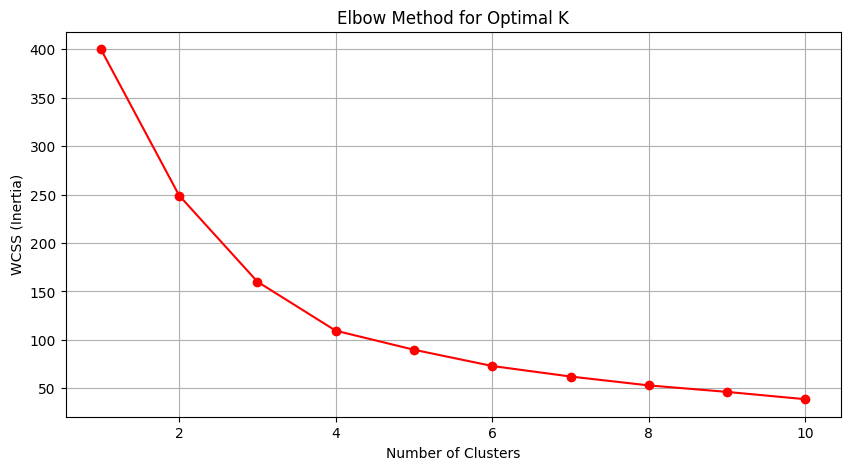

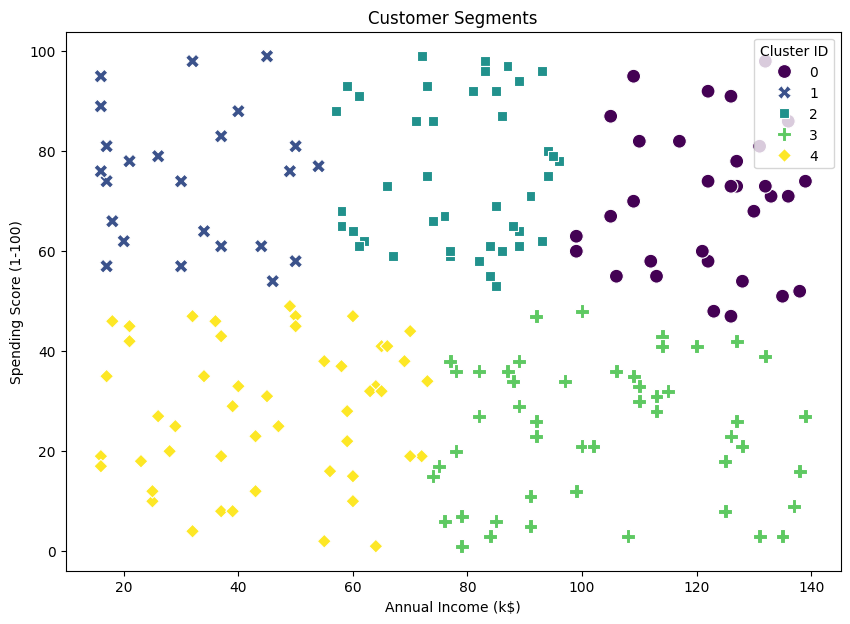

Task Complete: Segmented CSV saved.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- PART 1: LOAD OR CREATE DATA ---
try:
    # Attempt to load the actual Mall Customers dataset
    df = pd.read_csv('Mall_Customers.csv')
except FileNotFoundError:
    # Create dummy data if file is missing so the code remains runnable
    print("CSV not found. Generating sample data for demonstration...")
    data = {
        'CustomerID': range(1, 201),
        'Annual Income (k$)': np.random.randint(15, 140, 200),
        'Spending Score (1-100)': np.random.randint(1, 100, 200)
    }
    df = pd.DataFrame(data)

# --- PART 2: PREPROCESSING ---
# Select columns: Annual Income (index 3 or name) and Spending Score (index 4 or name)
# We use column names for better reliability
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Feature Scaling is mandatory for K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- PART 3: THE ELBOW METHOD ---
wcss = []
for i in range(1, 11):
    # n_init='auto' or 10 is required in newer sklearn versions to avoid warnings
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

# --- PART 4: FINAL MODEL ---
# Based on the Mall dataset, 5 is the standard optimal K
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add labels back to the dataframe
df['Cluster'] = clusters

# --- PART 5: VISUALIZATION ---
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='viridis',
    s=100,
    style=df['Cluster']
)
plt.title('Customer Segments')
plt.legend(title='Cluster ID')
plt.show()

# Save output
df.to_csv('Customer_Segmentation_Results.csv', index=False)
print("Task Complete: Segmented CSV saved.")

Clustering is an unsupervised learning technique used to group similar data points together. Unlike classification, there are no predefined labels; the algorithm finds patterns based on the inherent structure of the data.
K-Means relies on Euclidean Distance to assign points to clusters. If one feature (like Income) has a range of $15,000–$150,000 and another (Spending Score) is 1–100, the income will dominate the distance calculation. Scaling ensures all features contribute equally.
Inertia measures how tightly packed the clusters are. It is the sum of squared distances of samples to their closest cluster center. Lower inertia generally means better clusters, but it naturally decreases as you add more clusters.
It is a heuristic used to determine the optimal number of clusters (K). By plotting Inertia against the number of clusters, you look for the "elbow" point—the point where the rate of decrease in inertia slows down significantly.
Requires pre-defining K: You must know how many clusters you want beforehand.
Sensitive to Outliers: Since it uses means, a single outlier can significantly shift the cluster center.
Assumes Spherical Clusters: It struggles with complex, elongated, or overlapping data shapes.